#### CREAR UNA REGRESIÓN LOGÍSTICA PARA EL TITANIC PARA PREDECIR SI EL PASAJERO SURVIVIÓ O NO


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [2]:
#1 Cargar mi dataset
df = pd.read_csv('datasetTITanic_clean.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [3]:
# Seleccion de columas(caracteristicas) revantes para el modelo y target

X= df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
Y = df['Survived']

In [4]:
# 3. Definir columas numéricas y categóricas
numerical_features = ['Pclass','Age', 'Fare', 'Sex']
categorical_features = ['Embarked']

In [5]:
#4. Pipeline para cada tipo de datos
numeric_trasformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Reemplaza los valores faltantes por la media
    ('scaler', StandardScaler()) #Normaliza los datos
])

#Categorical inputar y codificar
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Reemplaza los valores faltantes por la moda
    ('onehot', OneHotEncoder(handle_unknown='ignore')) #Codifica las variables categóricas
])

In [6]:
#5. Preprocesar los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_trasformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [7]:
#6. Crear el modelo
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [8]:
#7. Dividir el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [9]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Age', 'Fare',
                                                   'Sex']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked'])])),
                ('classifier', LogisticRegression())])

In [10]:
print("Predicciones del modelo:", clf.score(X_test, y_test))

Predicciones del modelo: 0.7947761194029851


In [11]:
dato_nuevo = pd.DataFrame({
    'Pclass': [3],
    'Sex': [1],
    'Age': [50],
    'Fare': [80],
    'Embarked': ['S']
})

prediccion = clf.predict(dato_nuevo)
print(f"Predicción para el nuevo dato: {'Sobrevivió' if prediccion[0] == 1 else 'No sobrevivió'}")

Predicción para el nuevo dato: No sobrevivió


In [12]:
modelo = clf.named_steps['classifier']

col_num = numerical_features

col_cat = clf.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)

colummnas_finales = list(col_num) + list(col_cat)

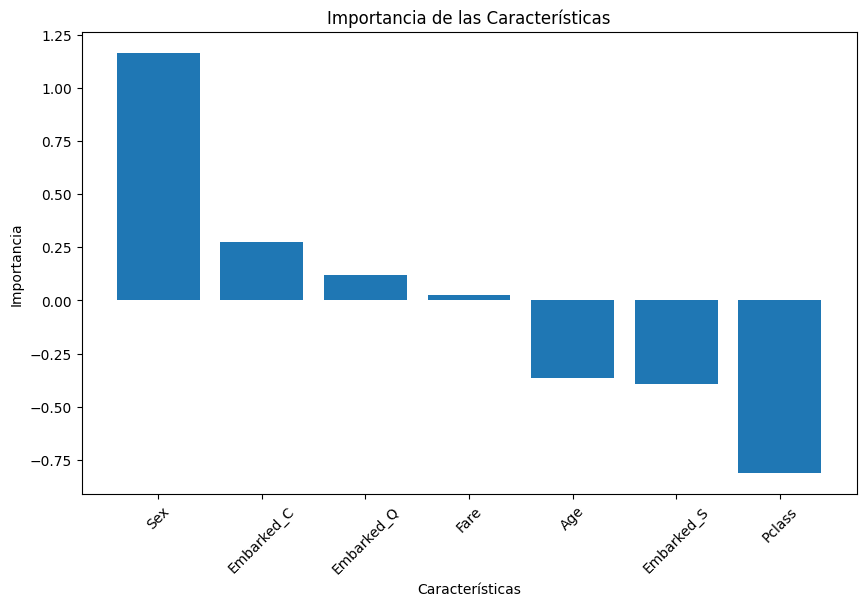

In [13]:
import matplotlib.pyplot as plt

importancia = pd.DataFrame({
    'caracteristicas': colummnas_finales,
    'importancia': modelo.coef_[0]
})

importancia = importancia.sort_values(by='importancia', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(importancia['caracteristicas'], importancia['importancia'])
plt.xticks(rotation=45)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las Características')
plt.show()